<a href="https://colab.research.google.com/github/Belita-Lili/Analisis-de-Datos-Tarifas/blob/main/Base_de_Datos_Tarifas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3

# Conectar a la base de datos (o crearla si no existe)
conn = sqlite3.connect("tarifas.db")
cursor = conn.cursor()

# Crear la tabla CalendarioTarifario
cursor.execute('''
CREATE TABLE IF NOT EXISTS CalendarioTarifario (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    fecha DATE UNIQUE NOT NULL,
    tipo TEXT NOT NULL CHECK (tipo IN ('Base', 'Intermedia', 'Punta'))
);
''')

# Crear la tabla TipoDia
cursor.execute('''
CREATE TABLE IF NOT EXISTS TipoDia (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    fecha DATE UNIQUE NOT NULL,
    categoria TEXT NOT NULL CHECK (categoria IN ('Laboral', 'Sábado', 'Domingo/Festivo'))
);
''')

# Crear la tabla DistribucionHoraria
cursor.execute('''
CREATE TABLE IF NOT EXISTS DistribucionHoraria (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    tipo_dia TEXT NOT NULL CHECK (tipo_dia IN ('Laboral', 'Sábado', 'Domingo/Festivo')),
    porcentaje_base REAL NOT NULL,
    porcentaje_intermedia REAL NOT NULL,
    porcentaje_punta REAL NOT NULL
);
''')

# Guardar los cambios y cerrar conexión
conn.commit()
conn.close()

print("Base de datos y tablas creadas con éxito.")


Base de datos y tablas creadas con éxito.


In [ ]:
def insertar_datos():
    conn = sqlite3.connect("tarifas.db")
    cursor = conn.cursor()

    # Insertar en CalendarioTarifario
    datos_calendario = [
        ("2025-01-01", "Base"),
        ("2025-01-02", "Intermedia"),
        ("2025-01-03", "Punta"),
    ]

    cursor.executemany("INSERT OR IGNORE INTO CalendarioTarifario (fecha, tipo) VALUES (?, ?)", datos_calendario)

    # Insertar en TipoDia
    datos_tipo_dia = [
        ("2025-01-01", "Domingo/Festivo"),
        ("2025-01-02", "Laboral"),
        ("2025-01-03", "Sábado"),
    ]

    cursor.executemany("INSERT OR IGNORE INTO TipoDia (fecha, categoria) VALUES (?, ?)", datos_tipo_dia)

    # Insertar en DistribucionHoraria
    datos_distribucion = [
        ("Laboral", 50, 30, 20),
        ("Sábado", 60, 30, 10),
        ("Domingo/Festivo", 80, 15, 5),
    ]

    cursor.executemany("INSERT OR IGNORE INTO DistribucionHoraria (tipo_dia, porcentaje_base, porcentaje_intermedia, porcentaje_punta) VALUES (?, ?, ?, ?)", datos_distribucion)

    conn.commit()
    conn.close()
    print("Datos insertados correctamente.")

insertar_datos()


Datos insertados correctamente.


In [ ]:
def consultar_tarifas(mes):
    conn = sqlite3.connect("tarifas.db")
    cursor = conn.cursor()

    query = f"""
    SELECT fecha, tipo FROM CalendarioTarifario
    WHERE strftime('%m', fecha) = '{mes}'
    ORDER BY fecha;
    """
    cursor.execute(query)
    resultados = cursor.fetchall()

    conn.close()
    return resultados

# Consultar tarifas de enero (mes "01")
tarifas_enero = consultar_tarifas("01")
for fecha, tipo in tarifas_enero:
    print(f"Fecha: {fecha}, Tarifa: {tipo}")


Fecha: 2025-01-01, Tarifa: Base
Fecha: 2025-01-02, Tarifa: Intermedia
Fecha: 2025-01-03, Tarifa: Punta


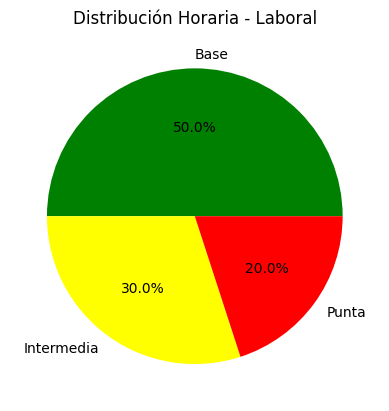

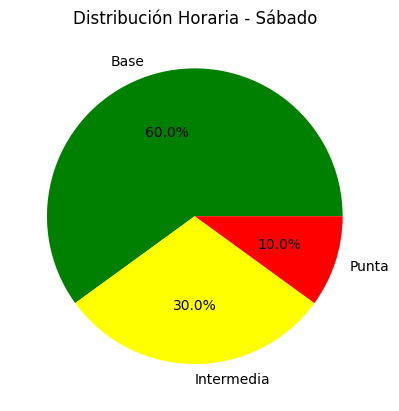

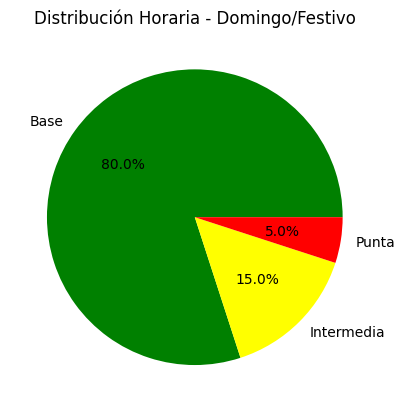

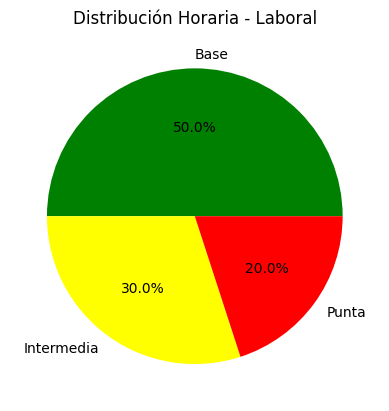

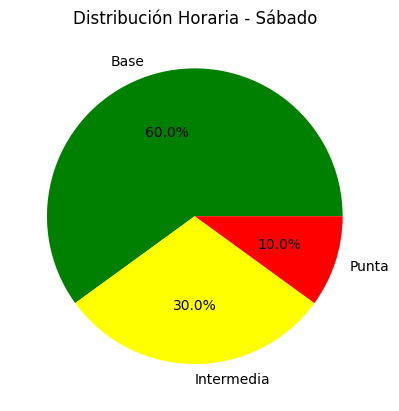

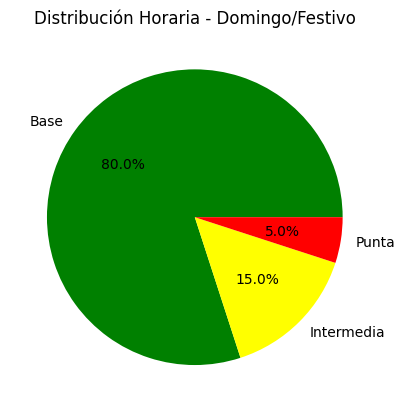

In [ ]:
import matplotlib.pyplot as plt

def graficar_distribucion():
    conn = sqlite3.connect("tarifas.db")
    cursor = conn.cursor()

    # Obtener datos
    cursor.execute("SELECT tipo_dia, porcentaje_base, porcentaje_intermedia, porcentaje_punta FROM DistribucionHoraria;")
    datos = cursor.fetchall()

    conn.close()

    # Graficar cada categoría
    for tipo_dia, base, intermedia, punta in datos:
        labels = ["Base", "Intermedia", "Punta"]
        valores = [base, intermedia, punta]
        colores = ["green", "yellow", "red"]

        plt.figure()
        plt.pie(valores, labels=labels, autopct="%1.1f%%", colors=colores)
        plt.title(f"Distribución Horaria - {tipo_dia}")
        plt.show()

graficar_distribucion()


In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("tarifas.db")
cursor = conn.cursor()

# Crear tabla de consumo mensual
cursor.execute('''
CREATE TABLE IF NOT EXISTS ConsumoMensual (
    mes TEXT PRIMARY KEY,
    base_kWh REAL,
    intermedia_kWh REAL,
    punta_kWh REAL
);
''')

# Crear tabla de horas por periodo tarifario
cursor.execute('''
CREATE TABLE IF NOT EXISTS HorasTarifarias (
    mes TEXT PRIMARY KEY,
    horas_base REAL,
    horas_intermedia REAL,
    horas_punta REAL
);
''')

conn.commit()
conn.close()


In [ ]:
datos_consumo = [
    ("Enero", 21120, 41760, 12240),
    ("Febrero", 26160, 70080, 18840),
    ("Marzo", 20040, 49200, 17160),
    ("Abril", 21120, 71520, 7320),
    ("Mayo", 35520, 81240, 7800),
    ("Junio", 25800, 89520, 8400),
    ("Julio", 27000, 78840, 7080),
    ("Agosto", 18000, 59160, 4920),
    ("Septiembre", 37680, 130560, 11280),
    ("Octubre", 26520, 84840, 7560),
    ("Noviembre", 33840, 90720, 18240),
    ("Diciembre", 24480, 75000, 25560)
]

conn = sqlite3.connect("tarifas.db")
cursor = conn.cursor()
cursor.executemany("INSERT OR IGNORE INTO ConsumoMensual (mes, base_kWh, intermedia_kWh, punta_kWh) VALUES (?, ?, ?, ?)", datos_consumo)
conn.commit()
conn.close()


In [ ]:
datos_horas = [
    ("Enero", 300, 250, 150),
    ("Febrero", 280, 270, 140),
    ("Marzo", 310, 240, 140),
    ("Abril", 290, 260, 130),
    ("Mayo", 305, 245, 135),
    ("Junio", 295, 255, 125),
    ("Julio", 315, 235, 140),
    ("Agosto", 280, 250, 130),
    ("Septiembre", 310, 260, 150),
    ("Octubre", 285, 270, 140),
    ("Noviembre", 300, 260, 140),
    ("Diciembre", 295, 250, 155)
]

conn = sqlite3.connect("tarifas.db")
cursor = conn.cursor()
cursor.executemany("INSERT OR IGNORE INTO HorasTarifarias (mes, horas_base, horas_intermedia, horas_punta) VALUES (?, ?, ?, ?)", datos_horas)
conn.commit()
conn.close()


In [ ]:
conn = sqlite3.connect("tarifas.db")
cursor = conn.cursor()

query = '''
SELECT c.mes,
       c.base_kWh / h.horas_base AS promedio_base,
       c.intermedia_kWh / h.horas_intermedia AS promedio_intermedia,
       c.punta_kWh / h.horas_punta AS promedio_punta
FROM ConsumoMensual c
JOIN HorasTarifarias h ON c.mes = h.mes;
'''

df = pd.read_sql(query, conn)
conn.close()

print(df)


           mes  promedio_base  promedio_intermedia  promedio_punta
0        Enero      70.400000           167.040000       81.600000
1      Febrero      93.428571           259.555556      134.571429
2        Marzo      64.645161           205.000000      122.571429
3        Abril      72.827586           275.076923       56.307692
4         Mayo     116.459016           331.591837       57.777778
5        Junio      87.457627           351.058824       67.200000
6        Julio      85.714286           335.489362       50.571429
7       Agosto      64.285714           236.640000       37.846154
8   Septiembre     121.548387           502.153846       75.200000
9      Octubre      93.052632           314.222222       54.000000
10   Noviembre     112.800000           348.923077      130.285714
11   Diciembre      82.983051           300.000000      164.903226


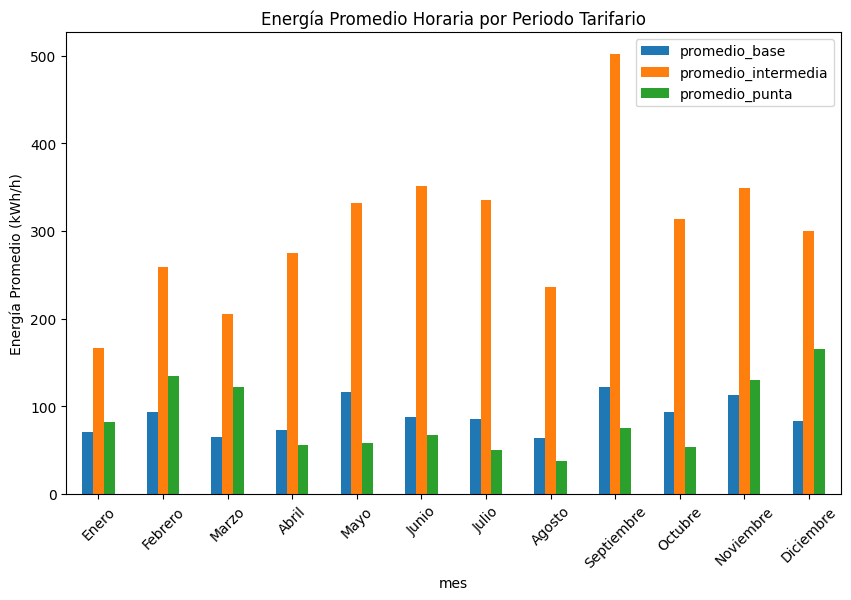

In [ ]:
import matplotlib.pyplot as plt

# Graficar energía promedio horaria
df.set_index("mes").plot(kind="bar", figsize=(10,6), ylabel="Energía Promedio (kWh/h)")
plt.title("Energía Promedio Horaria por Periodo Tarifario")
plt.xticks(rotation=45)
plt.show()


# **Normalización de datos**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

print(df_scaled)


           mes  promedio_base  promedio_intermedia  promedio_punta
0        Enero       0.106776             0.000000        0.344364
1      Febrero       0.508933             0.276072        0.761274
2        Marzo       0.006277             0.113275        0.666828
3        Abril       0.149170             0.322389        0.145301
4         Mayo       0.911122             0.491033        0.156871
5        Junio       0.404660             0.549123        0.231029
6        Julio       0.374215             0.502663        0.100154
7       Agosto       0.000000             0.207691        0.000000
8   Septiembre       1.000000             1.000000        0.293993
9      Octubre       0.502368             0.439201        0.127139
10   Noviembre       0.847224             0.542750        0.727544
11   Diciembre       0.326519             0.396761        1.000000


# **Análisis de tendencias (Evolución del consumo mensual)**

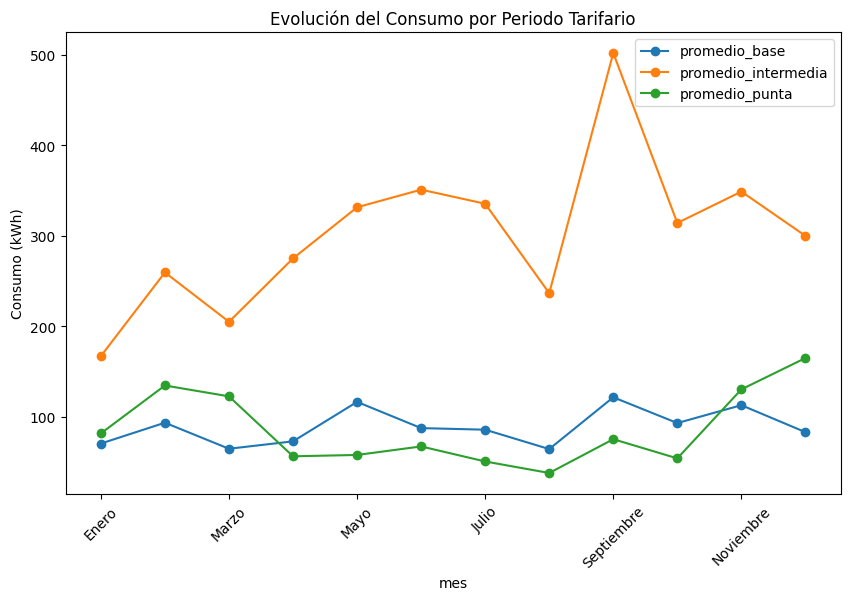

In [ ]:
df.set_index("mes").plot(figsize=(10,6), marker='o')
plt.title("Evolución del Consumo por Periodo Tarifario")
plt.ylabel("Consumo (kWh)")
plt.xticks(rotation=45)
plt.show()


# **Análisis de correlación**

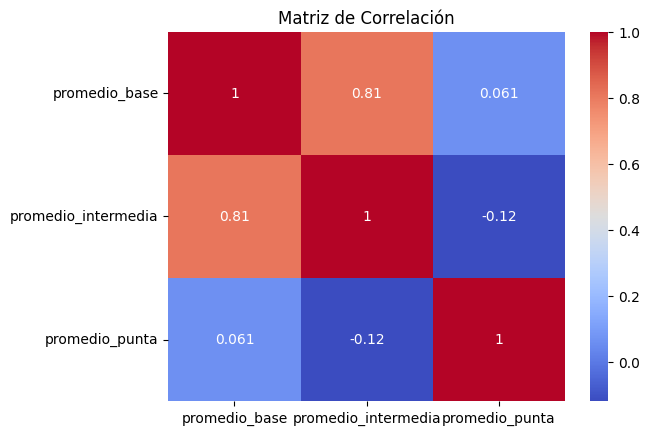

In [ ]:
import seaborn as sns

corr_matrix = df.iloc[:, 1:].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


# **Predicción del consumo futuro con Machine Learning**

In [ ]:
from sklearn.linear_model import LinearRegression

X = np.arange(len(df)).reshape(-1, 1)  # Índice de meses como variable independiente
y = df["promedio_base"].values  # Energía base como variable dependiente

modelo = LinearRegression()
modelo.fit(X, y)

# Predicción del próximo año
predicciones = modelo.predict(np.array([[12]]))  # Predecimos el mes 13 (enero del próximo año)

print(f"Predicción para enero del próximo año: {predicciones[0]:.2f} kWh/h")


Predicción para enero del próximo año: 102.37 kWh/h


# **Visualización avanzada con gráficos combinados**

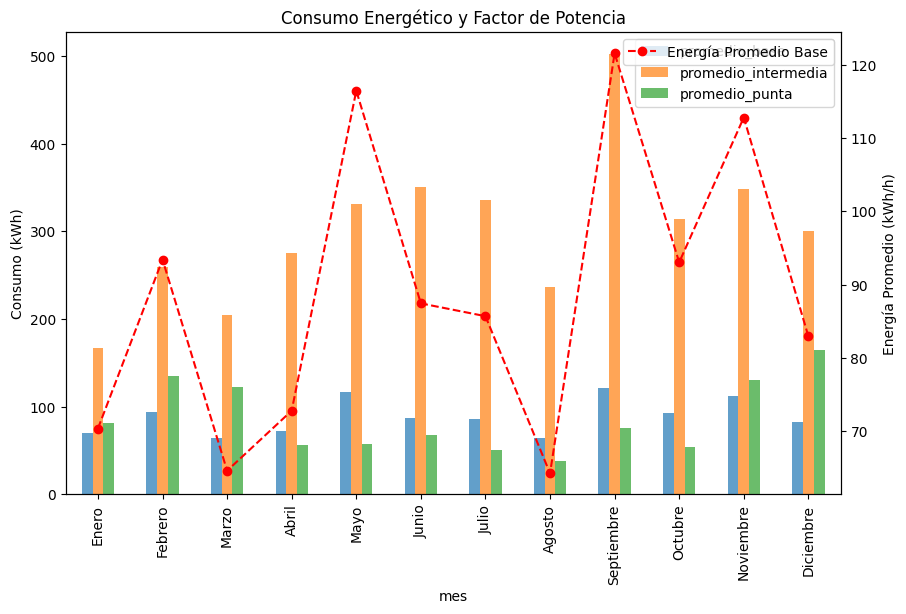

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras de consumo
df.set_index("mes").plot(kind="bar", ax=ax1, alpha=0.7)

# Línea de factor de potencia (F.P.)
ax2 = ax1.twinx()
ax2.plot(df["mes"], df["promedio_base"], color='red', marker='o', linestyle='dashed', label="Energía Promedio Base")

plt.title("Consumo Energético y Factor de Potencia")
ax1.set_ylabel("Consumo (kWh)")
ax2.set_ylabel("Energía Promedio (kWh/h)")
plt.legend()
plt.show()


# **Análisis de variabilidad y desviación estándar**

In [ ]:
df_stats = df.describe().T  # Estadísticas básicas por columna
df_stats["Coef_Variacion"] = df_stats["std"] / df_stats["mean"]  # Coeficiente de variación

print(df_stats[["mean", "std", "Coef_Variacion"]])


                           mean        std  Coef_Variacion
promedio_base         88.800169  19.716702        0.222035
promedio_intermedia  302.229304  85.939506        0.284352
promedio_punta        86.069571  41.174884        0.478391


# **Detección de anomalías en el consumo**

In [ ]:
from scipy.stats import zscore

df["z_base"] = zscore(df["promedio_base"])
df["z_intermedia"] = zscore(df["promedio_intermedia"])
df["z_punta"] = zscore(df["promedio_punta"])

# Filtrar anomalías (z-score mayor a 2 o menor a -2)
anomalías = df[(df["z_base"].abs() > 2) | (df["z_intermedia"].abs() > 2) | (df["z_punta"].abs() > 2)]

print("Meses con consumo anómalo:")
print(anomalías[["mes", "promedio_base", "promedio_intermedia", "promedio_punta"]])


Meses con consumo anómalo:
          mes  promedio_base  promedio_intermedia  promedio_punta
8  Septiembre     121.548387           502.153846            75.2


# **Clusterización de patrones de consumo**

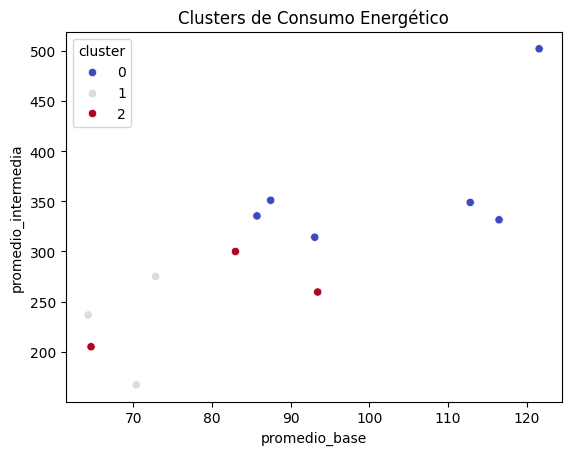

In [ ]:
from sklearn.cluster import KMeans

X = df.iloc[:, 1:4]  # Solo los consumos en kWh/h
kmeans = KMeans(n_clusters=3, random_state=42)  # Tres grupos
df["cluster"] = kmeans.fit_predict(X)

# Visualización
sns.scatterplot(data=df, x="promedio_base", y="promedio_intermedia", hue="cluster", palette="coolwarm")
plt.title("Clusters de Consumo Energético")
plt.show()


# **Optimización del factor de potencia (F.P.)**

In [ ]:
fp_values = [98.52, 94.25, 95.37, 96.49, 91.72, 89.74,
             87.56, 86.21, 89.01, 82.36, 89.77, 96.5]

# Verificar que la longitud coincide antes de agregar
if len(df) == len(fp_values):
    df["F.P.(%)"] = fp_values
else:
    print("Error: El número de valores en fp_values no coincide con el número de filas en df.")

print(df)

           mes  promedio_base  promedio_intermedia  promedio_punta  F.P.(%)
0        Enero      70.400000           167.040000       81.600000    98.52
1      Febrero      93.428571           259.555556      134.571429    94.25
2        Marzo      64.645161           205.000000      122.571429    95.37
3        Abril      72.827586           275.076923       56.307692    96.49
4         Mayo     116.459016           331.591837       57.777778    91.72
5        Junio      87.457627           351.058824       67.200000    89.74
6        Julio      85.714286           335.489362       50.571429    87.56
7       Agosto      64.285714           236.640000       37.846154    86.21
8   Septiembre     121.548387           502.153846       75.200000    89.01
9      Octubre      93.052632           314.222222       54.000000    82.36
10   Noviembre     112.800000           348.923077      130.285714    89.77
11   Diciembre      82.983051           300.000000      164.903226    96.50


In [ ]:
conn = sqlite3.connect("tarifas.db")
cursor = conn.cursor()

# Agregar la columna si no existe
cursor.execute("ALTER TABLE ConsumoMensual ADD COLUMN fp REAL;")
conn.commit()
conn.close()
print("Columna 'fp' agregada a la base de datos.")


Columna 'fp' agregada a la base de datos.


In [ ]:
conn = sqlite3.connect("tarifas.db")
cursor = conn.cursor()

for i, mes in enumerate(df["mes"]):
    cursor.execute("UPDATE ConsumoMensual SET fp = ? WHERE mes = ?", (fp_values[i], mes))

conn.commit()
conn.close()
print("Factor de Potencia actualizado en la base de datos.")


Factor de Potencia actualizado en la base de datos.


In [ ]:
import numpy as np
import pandas as pd

# 🔹 1. Eliminar columnas duplicadas para evitar errores
df = df.loc[:, ~df.columns.duplicated()]

# 🔹 2. Verificar columnas disponibles
print("Columnas después de eliminar duplicadas:", df.columns)

# 🔹 3. Si 'Facturable' no existe, la creamos sumando los consumos
if "Facturable" not in df.columns:
    print("⚠ Advertencia: 'Facturable' no existe. Se calculará automáticamente.")
    df["Facturable"] = df["promedio_base"] + df["promedio_intermedia"] + df["promedio_punta"]

# 🔹 4. Verificar si 'F.P.(%)' existe y limpiar datos
if "F.P.(%)" in df.columns and "Facturable" in df.columns:
    df["F.P.(%)"] = pd.to_numeric(df["F.P.(%)"], errors="coerce")
    df["Facturable"] = pd.to_numeric(df["Facturable"], errors="coerce")

    # Asegurar que 'F.P.(%)' esté entre 0 y 100%
    df["F.P.(%)"] = df["F.P.(%)"].clip(0, 100)

    # Convertir a radianes
    df["fp_radianes"] = np.arccos(df["F.P.(%)"] / 100)
    df["tan_fp_actual"] = np.tan(df["fp_radianes"])
    df["tan_fp_objetivo"] = np.tan(np.arccos(0.95))

    # Calcular la potencia reactiva a compensar
    df["Q_compensacion"] = df["Facturable"] * (df["tan_fp_actual"] - df["tan_fp_objetivo"])

    print(df[["mes", "Facturable", "F.P.(%)", "Q_compensacion"]])
else:
    print("⚠ Error: No se encontraron las columnas necesarias ('F.P.(%)' o 'Facturable').")


Columnas después de eliminar duplicadas: Index(['mes', 'promedio_base', 'promedio_intermedia', 'promedio_punta',
       'F.P.(%)', 'Facturable'],
      dtype='object')
           mes  Facturable  F.P.(%)  Q_compensacion
0        Enero  319.040000    98.52      -49.355614
1      Febrero  487.555556    94.25       12.633188
2        Marzo  392.216590    95.37       -5.225638
3        Abril  404.212202    96.49      -22.843381
4         Mayo  505.828631    91.72       53.471605
5        Junio  505.716451    89.74       82.420843
6        Julio  471.775076    87.56      105.196300
7       Agosto  338.771868    86.21       87.779528
8   Septiembre  698.902233    89.01      128.146647
9      Octubre  461.274854    82.36      166.042625
10   Noviembre  592.008791    89.77       95.984617
11   Diciembre  547.886277    96.50      -31.187095


# **Calcular los capacitores requeridos**

In [ ]:
import numpy as np
import pandas as pd

# 🔹 1. Asegurar que 'Facturable' y 'F.P.(%)' existen
if "Facturable" not in df.columns:
    print("⚠ 'Facturable' no existe, se calculará sumando consumos.")
    df["Facturable"] = df["promedio_base"] + df["promedio_intermedia"] + df["promedio_punta"]

if "F.P.(%)" in df.columns and "Facturable" in df.columns:
    df["F.P.(%)"] = pd.to_numeric(df["F.P.(%)"], errors="coerce") / 100  # Convertir a decimal

    # 🔹 2. Convertir el Factor de Potencia en ángulo en radianes
    df["fp_radianes"] = np.arccos(df["F.P.(%)"])
    df["tan_fp_actual"] = np.tan(df["fp_radianes"])
    df["tan_fp_objetivo"] = np.tan(np.arccos(0.95))

    # 🔹 3. Calcular la potencia reactiva a compensar
    df["Q_compensacion"] = df["Facturable"] * (df["tan_fp_actual"] - df["tan_fp_objetivo"])

    # 🔹 4. Convertir a kVAr
    df["Capacitores_kVAr"] = df["Q_compensacion"] / 1000

    print("Optimización del Factor de Potencia (kVAr necesarios):")
    print(df[["mes", "Facturable", "F.P.(%)", "Capacitores_kVAr"]])
else:
    print("⚠ Error: No se encontraron las columnas necesarias ('F.P.(%)' o 'Facturable').")


Optimización del Factor de Potencia (kVAr necesarios):
           mes  Facturable  F.P.(%)  Capacitores_kVAr
0        Enero  319.040000   0.9852         -0.049356
1      Febrero  487.555556   0.9425          0.012633
2        Marzo  392.216590   0.9537         -0.005226
3        Abril  404.212202   0.9649         -0.022843
4         Mayo  505.828631   0.9172          0.053472
5        Junio  505.716451   0.8974          0.082421
6        Julio  471.775076   0.8756          0.105196
7       Agosto  338.771868   0.8621          0.087780
8   Septiembre  698.902233   0.8901          0.128147
9      Octubre  461.274854   0.8236          0.166043
10   Noviembre  592.008791   0.8977          0.095985
11   Diciembre  547.886277   0.9650         -0.031187


# ** Proyección de Ahorro con Paneles Solares**

In [ ]:
# 🔹 1. Definir el rendimiento solar (horas de sol diarias)
rendimiento_pv = 5.5  # kWh generados por cada kW instalado por día

# 🔹 2. Calcular la potencia fotovoltaica necesaria para cubrir el 30% del consumo
df["PV_requerido_kW"] = (df["Facturable"] * 0.3) / (rendimiento_pv * 30)

print("Proyección de Ahorro con Paneles Solares:")
print(df[["mes", "Facturable", "PV_requerido_kW"]])


Proyección de Ahorro con Paneles Solares:
           mes  Facturable  PV_requerido_kW
0        Enero  319.040000         0.580073
1      Febrero  487.555556         0.886465
2        Marzo  392.216590         0.713121
3        Abril  404.212202         0.734931
4         Mayo  505.828631         0.919688
5        Junio  505.716451         0.919484
6        Julio  471.775076         0.857773
7       Agosto  338.771868         0.615949
8   Septiembre  698.902233         1.270731
9      Octubre  461.274854         0.838682
10   Noviembre  592.008791         1.076380
11   Diciembre  547.886277         0.996157


# **Visualización de Resultados**

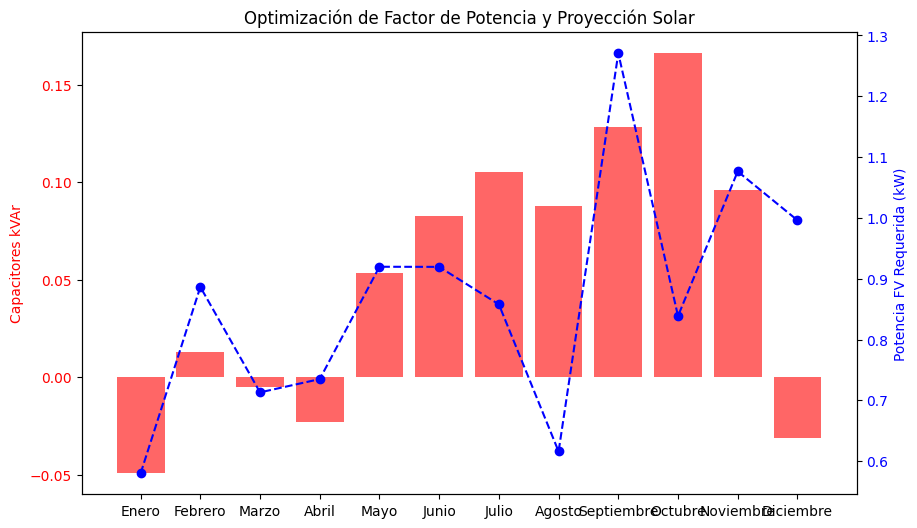

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# 🔹 Gráfico de Capacitores
ax1.bar(df["mes"], df["Capacitores_kVAr"], color="red", alpha=0.6, label="Capacitores (kVAr)")
ax1.set_ylabel("Capacitores kVAr", color="red")
ax1.tick_params(axis="y", labelcolor="red")

# 🔹 Gráfico de Potencia Solar
ax2 = ax1.twinx()
ax2.plot(df["mes"], df["PV_requerido_kW"], color="blue", marker="o", linestyle="dashed", label="Potencia FV (kW)")
ax2.set_ylabel("Potencia FV Requerida (kW)", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Optimización de Factor de Potencia y Proyección Solar")
plt.show()
